In [279]:
import pandas as pd
import re
import statistics
import warnings
from datetime import timedelta 
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
warnings.filterwarnings("ignore")

# 1. Review Data

## 1.1 Read data

In [94]:
# Read the data
reviews_clothing_shoes_jewelry = pd.read_csv("reviews_Clothing_Shoes_and_Jewelry_5.csv", parse_dates=["reviewTime"])
reviews_clothing_shoes_jewelry_bkp = reviews_clothing_shoes_jewelry
reviews_clothing_shoes_jewelry.head(2)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,2011-02-12
1,1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,2013-01-19


In [280]:
reviews_clothing_shoes_jewelry = reviews_clothing_shoes_jewelry_bkp

## 1.2 Data Cleaning and Feature transformation

In [281]:
reviews_clothing_shoes_jewelry.isnull().sum()

Unnamed: 0          0
reviewerID          0
asin                0
reviewerName      469
helpful             0
reviewText         24
overall             0
summary             1
unixReviewTime      0
reviewTime          0
dtype: int64

In [282]:
# Remove rows with empty value (Important columns)
reviews_clothing_shoes_jewelry = reviews_clothing_shoes_jewelry[~reviews_clothing_shoes_jewelry.reviewText.isna()]

reviews_clothing_shoes_jewelry.isnull().sum()

Unnamed: 0          0
reviewerID          0
asin                0
reviewerName      469
helpful             0
reviewText          0
overall             0
summary             1
unixReviewTime      0
reviewTime          0
dtype: int64

In [283]:
def calculate_mean_helpful(helpful):
    return statistics.mean([int(x) for x in re.findall('\d+', helpful)])

reviews_clothing_shoes_jewelry["helpful_mean"] = reviews_clothing_shoes_jewelry["helpful"].apply(calculate_mean_helpful)

In [284]:
# Remove unnecessary column
reviews_clothing_shoes_jewelry.drop(['Unnamed: 0', 'reviewerName', 'helpful', 'summary', 'unixReviewTime'], axis = 1, inplace=True)
reviews_clothing_shoes_jewelry.head(2)

,reviewerID,asin,reviewText,overall,reviewTime,helpful_mean
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5.0,2011-02-12,0.0
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5.0,2013-01-19,0.0


In [285]:
# Create new features
reviews_clothing_shoes_jewelry["reviewYear"] = pd.DatetimeIndex(reviews_clothing_shoes_jewelry["reviewTime"]).year
reviews_clothing_shoes_jewelry["reviewMonth"] = pd.DatetimeIndex(reviews_clothing_shoes_jewelry["reviewTime"]).month
reviews_clothing_shoes_jewelry["reviewDay"] = pd.DatetimeIndex(reviews_clothing_shoes_jewelry["reviewTime"]).day
reviews_clothing_shoes_jewelry["reviewQuarter"] =  reviews_clothing_shoes_jewelry["reviewTime"].dt.quarter
reviews_clothing_shoes_jewelry["reviewDayOfWeek"] =  reviews_clothing_shoes_jewelry["reviewTime"].dt.weekday
reviews_clothing_shoes_jewelry["reviewIsWeekend"] =  (reviews_clothing_shoes_jewelry["reviewDayOfWeek"] == 6) | (reviews_clothing_shoes_jewelry["reviewDayOfWeek"] == 7)
reviews_clothing_shoes_jewelry["reviewTextLength"] =reviews_clothing_shoes_jewelry["reviewText"].apply(len)

In [287]:
reference_date = reviews_clothing_shoes_jewelry["reviewTime"].max() + timedelta(days=1)
reviews_clothing_shoes_jewelry["days_since_review"] = (reference_date - reviews_clothing_shoes_jewelry["reviewTime"]).dt.days
reviews_clothing_shoes_jewelry["weeks_since_review"] = (reference_date - reviews_clothing_shoes_jewelry["reviewTime"]).dt.days/7
reviews_clothing_shoes_jewelry["weeks_since_review"] = reviews_clothing_shoes_jewelry["weeks_since_review"].apply(math.ceil)

In [288]:
reviews_clothing_shoes_jewelry.head(2)

,reviewerID,asin,reviewText,overall,reviewTime,helpful_mean,reviewYear,reviewMonth,reviewDay,reviewQuarter,reviewDayOfWeek,reviewIsWeekend,reviewTextLength,days_since_review,weeks_since_review
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5.0,2011-02-12,0.0,2011,2,12,1,5,False,172,1258,180
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5.0,2013-01-19,0.0,2013,1,19,1,5,False,306,551,79


# 2. Metadata

## 2.1 Read data

In [289]:
# Read data
metadata_clothing_shoes_jewelry = pd.read_csv("metadata_category_clothing_shoes_and_jewelry_only.csv")
metadata_clothing_shoes_jewelry_bkp = metadata_clothing_shoes_jewelry
metadata_clothing_shoes_jewelry.head(2)

,metadataid,asin,salesrank,imurl,categories,title,description,price,related,brand
0,2005401,B00004SR8Z,{'Clothing': 1631},http://ecx.images-amazon.com/images/I/41RfWLMD...,"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",Lewis N. Clark Deluxe Neck Stash,NaN,12.8,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",Lewis N. Clark
1,2217897,B0000ZE74A,{'Clothing': 4742},http://ecx.images-amazon.com/images/I/41ryA-RO...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vanity Fair Women's Lollipop Plus Size Cuff Le...,NaN,NaN,"{'also_bought': ['B004PEHJ6U', 'B0000TF5VK', '...",NaN


In [290]:
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry_bkp

## 2.2 Data Cleaning and Feature transformation

In [291]:
metadata_clothing_shoes_jewelry.isnull().sum()

metadataid         0
asin               0
salesrank       1107
imurl              0
categories         0
title             23
description    21613
price          12913
related          124
brand          19091
dtype: int64

In [292]:
# Remove rows with empty value (Important columns)
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry[~metadata_clothing_shoes_jewelry.price.isna()]
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry[~metadata_clothing_shoes_jewelry.salesrank.isna()]
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry[~metadata_clothing_shoes_jewelry.related.isna()]
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry[~metadata_clothing_shoes_jewelry.brand.isna()]

metadata_clothing_shoes_jewelry.isnull().sum()

metadataid        0
asin              0
salesrank         0
imurl             0
categories        0
title             0
description    2839
price             0
related           0
brand             0
dtype: int64

In [293]:
# Remove unnecessary column
metadata_clothing_shoes_jewelry.drop(['imurl', 'metadataid', 'description', "title"], axis = 1, inplace=True)
metadata_clothing_shoes_jewelry.head(2)

,asin,salesrank,categories,price,related,brand
0,B00004SR8Z,{'Clothing': 1631},"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",12.80,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",Lewis N. Clark
4,B00066TWMU,{'Clothing': 1199},"[['Clothing, Shoes & Jewelry', 'ASICS'], ['Clo...",12.41,"{'also_bought': ['B009DB3RS4', 'B001PFA35G', '...",ASICS


In [294]:
def find_salesrank(salesrank):
    rank = [int(x) for x in re.findall('\d+', salesrank.replace("'", ""))]
    
    if len(rank) == 0:
        final_rank = None
    else:
        final_rank = statistics.mean(rank)
        
    return final_rank

metadata_clothing_shoes_jewelry["sales_rank"] = metadata_clothing_shoes_jewelry["salesrank"].apply(find_salesrank)

In [295]:
def find_sales_category(salesrank):
    category = [x for x in re.findall('[a-zA-Z]+', salesrank)]
    
    if len(category) == 0:
        final_category = None
    else:
        final_category = " ".join(category)
        
    return final_category

metadata_clothing_shoes_jewelry["sales_category"] = metadata_clothing_shoes_jewelry["salesrank"].apply(find_sales_category)

In [296]:
def find_related_product(related):
    patterns= [r'\w+']
    
    for p in patterns:
        related_products = re.findall(p, related.replace("also_bought", ""))
    
    if len(related_products) == 0:
        final_related_products = None
    else:
        final_related_products = ", ".join(related_products)
        
    return final_related_products

metadata_clothing_shoes_jewelry["also_bought"] = metadata_clothing_shoes_jewelry["related"].apply(find_related_product)

In [297]:
metadata_clothing_shoes_jewelry.isnull().sum()

asin               0
salesrank          0
categories         0
price              0
related            0
brand              0
sales_rank        73
sales_category    73
also_bought        0
dtype: int64

In [298]:
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry[~metadata_clothing_shoes_jewelry.sales_rank.isna()]
metadata_clothing_shoes_jewelry = metadata_clothing_shoes_jewelry[~metadata_clothing_shoes_jewelry.sales_category.isna()]
metadata_clothing_shoes_jewelry.isnull().sum()

asin              0
salesrank         0
categories        0
price             0
related           0
brand             0
sales_rank        0
sales_category    0
also_bought       0
dtype: int64

In [299]:
# Remove unnecessary column
metadata_clothing_shoes_jewelry.drop(['salesrank', 'categories', 'related'], axis = 1, inplace=True)
metadata_clothing_shoes_jewelry.head(2)

,asin,price,brand,sales_rank,sales_category,also_bought
0,B00004SR8Z,12.80,Lewis N. Clark,1631.0,Clothing,"B004RJWFDU, B00920ZC3O, B00920ZC3Y, B004RJWFN0..."
4,B00066TWMU,12.41,ASICS,1199.0,Clothing,"B009DB3RS4, B001PFA35G, B00G3K71KS, B00KOWEIAW..."


# 3. Merge two datasets

In [301]:
reviews_metadata = reviews_clothing_shoes_jewelry.merge(metadata_clothing_shoes_jewelry, how="inner", left_on="asin", right_on="asin")
reviews_metadata.head(2)

,reviewerID,asin,reviewText,overall,reviewTime,helpful_mean,reviewYear,reviewMonth,reviewDay,reviewQuarter,reviewDayOfWeek,reviewIsWeekend,reviewTextLength,days_since_review,weeks_since_review,price,brand,sales_rank,sales_category,also_bought
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5.0,2011-02-12,0.0,2011,2,12,1,5,False,172,1258,180,6.79,Boutique Cutie,8547.0,Sports amp Outdoors,"0000031852, 0000031895, 0000031909, B00D2K1M3O..."
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5.0,2013-01-19,0.0,2013,1,19,1,5,False,306,551,79,6.79,Boutique Cutie,8547.0,Sports amp Outdoors,"0000031852, 0000031895, 0000031909, B00D2K1M3O..."


In [302]:
reviews_metadata.to_csv("clean_reviews_metadata.csv")

## 3.1 Group based on Customer

In [303]:
customer_recency_freq_monetary_matrix = reviews_metadata.groupby(["reviewerID"]).agg({"weeks_since_review": "min", "reviewYear": "count", "price": "sum"})
customer_recency_freq_monetary_matrix.reset_index(inplace=True)

customer_recency_freq_monetary_matrix.rename(
    columns={
        "weeks_since_review": "weeks_since_last_review",
        "reviewYear": "number_of_reviews",
        "price": "total_purchase_amount"
    },
    inplace=True,
)

customer_recency_freq_monetary_matrix.head()

,reviewerID,weeks_since_last_review,number_of_reviews,total_purchase_amount
0,A001114613O3F18Q5NVR6,90,1,52.99
1,A00338282E99B8OR2JYTZ,28,2,23.54
2,A00354001GE099Q1FL0TU,58,1,18.02
3,A007227915NZZC7B6P030,7,1,13.64
4,A01103631SAT3BPLD52LV,57,1,10.00


In [313]:
customer_recency_freq_monetary_matrix["relative_recency_score"] = 1/(customer_recency_freq_monetary_matrix["weeks_since_last_review"]/customer_recency_freq_monetary_matrix["weeks_since_last_review"].max())
customer_recency_freq_monetary_matrix["relative_recency_score"] = customer_recency_freq_monetary_matrix["relative_recency_score"]/customer_recency_freq_monetary_matrix["relative_recency_score"].max()
customer_recency_freq_monetary_matrix["relative_frequency_score"] = customer_recency_freq_monetary_matrix["number_of_reviews"]/customer_recency_freq_monetary_matrix["number_of_reviews"].max()
customer_recency_freq_monetary_matrix["relative_monetary_score"] = customer_recency_freq_monetary_matrix["total_purchase_amount"]/customer_recency_freq_monetary_matrix["total_purchase_amount"].max()

customer_recency_freq_monetary_matrix["relative_RFC_score"] = customer_recency_freq_monetary_matrix["relative_recency_score"] * customer_recency_freq_monetary_matrix["relative_frequency_score"] * customer_recency_freq_monetary_matrix["relative_monetary_score"] * 100

In [314]:
customer_recency_freq_monetary_matrix.head()

,reviewerID,weeks_since_last_review,number_of_reviews,total_purchase_amount,relative_recency_score,relative_frequency_score,relative_monetary_score,relative_RFC_score
0,A001114613O3F18Q5NVR6,90,1,52.99,0.011111,0.02439,0.008212,0.000223
1,A00338282E99B8OR2JYTZ,28,2,23.54,0.035714,0.04878,0.003648,0.000636
2,A00354001GE099Q1FL0TU,58,1,18.02,0.017241,0.02439,0.002793,0.000117
3,A007227915NZZC7B6P030,7,1,13.64,0.142857,0.02439,0.002114,0.000737
4,A01103631SAT3BPLD52LV,57,1,10.00,0.017544,0.02439,0.001550,0.000066


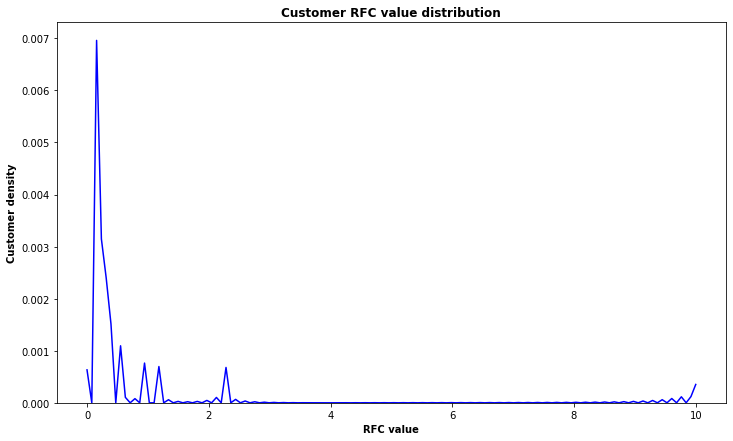

In [315]:
plt.figure(figsize=(12,7))
sns.distplot(
    customer_recency_freq_monetary_matrix["relative_RFC_score"],
    hist=False,
    kde=True,
    bins=0.1,
    color="blue",
    hist_kws={"edgecolor": "black"},
)

plt.title("Customer RFC value distribution", fontweight='bold')
plt.xlabel("RFC value", fontweight='bold')
plt.ylabel("Customer density", fontweight='bold')
plt.show()

In [322]:
customer_rating_helpfulness = reviews_metadata.groupby(["reviewerID"]).agg({"helpful_mean": "mean", "overall": "mean"})
customer_rating_helpfulness.reset_index(inplace=True)

customer_rating_helpfulness.rename(
    columns={
        "overall": "product_rating_mean"
    },
    inplace=True,
)

customer_rating_helpfulness.head()

,reviewerID,helpful_mean,product_rating_mean
0,A001114613O3F18Q5NVR6,1.0,5.0
1,A00338282E99B8OR2JYTZ,0.0,4.0
2,A00354001GE099Q1FL0TU,0.0,3.0
3,A007227915NZZC7B6P030,0.0,5.0
4,A01103631SAT3BPLD52LV,0.0,5.0


## 3.2 Cross buy analysis

In [332]:
reviews_metadata.head(2)

,reviewerID,asin,reviewText,overall,reviewTime,helpful_mean,reviewYear,reviewMonth,reviewDay,reviewQuarter,reviewDayOfWeek,reviewIsWeekend,reviewTextLength,days_since_review,weeks_since_review,price,brand,sales_rank,sales_category,also_bought
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5.0,2011-02-12,0.0,2011,2,12,1,5,False,172,1258,180,6.79,Boutique Cutie,8547.0,Sports amp Outdoors,"0000031852, 0000031895, 0000031909, B00D2K1M3O..."
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5.0,2013-01-19,0.0,2013,1,19,1,5,False,306,551,79,6.79,Boutique Cutie,8547.0,Sports amp Outdoors,"0000031852, 0000031895, 0000031909, B00D2K1M3O..."


In [ ]:
def find_related_product_avg_rating(also_bought):
    related_products = also_bought.split(", ")
    sum_rating_related_products = 0
    
    for related_product in related_products:
        sum_rating_related_products = sum_rating_related_products + reviews_metadata[reviews_metadata["asin"] == related_product]["overall"].mean()
    
    if len(related_products) == 0:
        return 0
    else:
        return sum_rating_related_products/len(related_products)

reviews_metadata["related_product_avg_rating"] = reviews_metadata["also_bought"].apply(find_related_product_avg_rating)

In [1]:
reviews_metadata.head()

NameError: name 'reviews_metadata' is not defined